import 목록

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
%matplotlib inline
mpl.rc('font', size = 10)

import warnings

import numpy as np
import pandas as pd
import scipy

import os
import glob

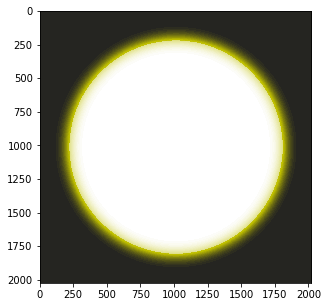

In [6]:
moon = np.zeros((2022, 2022), dtype=int)
r = 800
for i in range(2022):
    for j in range(2022):
        d = np.sqrt(np.power(i-1011, 2) + np.power(j-1011, 2))
        if d < r:
            moon[i, j] = 255

from scipy.ndimage import gaussian_filter
glow = gaussian_filter(moon, 50)

from matplotlib.colors import ListedColormap
cmap0 = sns.color_palette("dark:y", 20)
cmap1 = sns.color_palette("blend:y,w", 20)

cmap = ListedColormap(cmap0 + cmap1)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(glow, origin="upper", zorder=0, cmap=cmap)
ax.imshow(np.ma.masked_array(moon, moon <1), origin="upper", zorder=0, 
          vmin=0, vmax=255, cmap=cmap, alpha=0.5)

## 구글 드라이브 연동

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#data handling

## 데이터 프레임 타입별로 분리 요약

In [ ]:
a = df.columns.to_series().groupby(df.dtypes).groups
for i,v in a.items():
    print(i,v)

## 피처요약표

In [ ]:
def resumetable(df):
    print(f'데이터셋 형상 : {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터타입']) #.sort_values()
    #summary = summary.reset_index()
    #summary = summary.rename(columns = {'index':'피처'})

    #summary['결측치 개수'] = df.isnull().sum().values #결측치가 존재하지 않더라도 -1같은 값으로 있는 경우가 있으니 확인 필요!
    
    summary['결측치 개수'] = (df == -1).sum().values # 피처별 -1 개수

    summary['고윳값 개수'] = df.nunique().values
    # summary['첫 번째 값'] = df.loc[0].values
    # summary['두 번째 값'] = df.loc[1].values
    # summary['세 번째 값'] = df.loc[2].values

    for col in df.columns: 
        
        if 'bin' in col or col == 'target':
            summary.loc[col, '데이터 종류'] = '이진형'
        elif 'cat' in col:
            summary.loc[col, '데이터 종류'] = '명목형'
        elif df[col].dtype == float:
            summary.loc[col, '데이터 종류'] = '연속형'
        elif df[col].dtype == int:
            summary.loc[col, '데이터 종류'] = '순서형'

    return summary

##infoDF

In [ ]:
def infoDF(data):
    floatColCounter = 0
    floatCols = []
    intColCounter = 0
    intCols = []
    stringColCounter = 0
    stringCols = []
    print('No of rows-> {}, No of columns-> {}'.format(data.shape[0], data.shape[1]))
    print('          ------------------------          ')
    for column in data.columns:
        if data[column].dtype == int:
            intColCounter += 1
            print('{} dtype -> integer, % 결측치 비율-> {}%, 교유값 수-> {}'.format(column, round((data[column].isnull().sum()/data.shape[0])*100, 2), data[column].nunique()))
            intCols.append(column)
        elif data[column].dtype == float:
            floatColCounter += 1
            print('{} dtype -> float, % 결측치 비율-> {}%, 고윳값 수-> {}'.format(column, round((data[column].isnull().sum()/data.shape[0])*100, 2), data[column].nunique()))
            floatCols.append(column)
        else:
            stringColCounter += 1
            print('{} dtype -> string, % 결측치 비율-> {}%, 고윳값 수-> {}'.format(column, round((data[column].isnull().sum()/data.shape[0])*100, 2), data[column].nunique()))
            stringCols.append(column)
            
    print('No of integer column-> {}, No of floating column-> {}, No of string or object columns-> {}'.format(intColCounter, floatColCounter, stringColCounter))
    print('          ------------------------          ')
    print('% of Null/Missing Values in training data-> {}%'.format(round((data.isnull().sum().sum()/(data.shape[0]*trainDF.shape[1]))*100, 2)))
    print('          ------------------------          ')
    return intCols, floatCols, stringCols

##read_data

In [ ]:
import glob
from google.colab import drive

drive.mount('/content/drive')

path = '/content/drive/MyDrive/data/porto-seguro-safe-driver-prediction'

files = glob.glob(path + '/*.csv')
for file in files:
    if 'train' in file:
        train = pd.read_csv(file)
    elif 'test' in file:
        test = pd.read_csv(file)
    elif 'sample' in file:
        sub = pd.read_csv(file)
train.shape, test.shape, sub.shape

##메모리관리 downcast, gc

In [ ]:
import gc

del group
gc.collect()

In [ ]:
def downcast(df, verbose=True):
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        dtype_name = df[col].dtype.name
        if dtype_name == 'object':
            pass
        elif dtype_name == 'bool':
            df[col] = df[col].astype('int8')
        elif dtype_name.startswith('int') or (df[col].round() == df[col]).all():
            df[col] = pd.to_numeric(df[col], downcast='integer')
        else:
            df[col] = pd.to_numeric(df[col], downcast='float')
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose:
        print('{:.1f}% 압축됨'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

#시각화

## subplot ax 사용법

In [ ]:
figure, ax= plt.subplots() 
figure.set_size_inches(11, 5)

sns.barplot(x='x', y='y', data=data)

ax.set(title='Distribution of total item counts by item category id',
       xlabel='Item category ID', 
       ylabel='Total item counts')
ax.tick_params(axis='x', labelrotation=90) # x축 라벨 회전

##target에 대한 정규성 검증 qqplot 함수

In [ ]:
#sapiro Normality Test
from scipy import stats
#qqplot 
from scipy.stats import probplot

def shapiro_qq_plot(df):
    #Shapiro 통계량이 높으면 정규분포에 더 근접하지만 그렇다고 무조건 acc도 올라가지는 않는다.
    '''
    Args:
        df['target']

    Returns:
        qq_plot and Shapiro statics of df['target']
        with [raw, sqrt, log, log1p] transformations
    '''
    
    # 경고메세지 끄기
    import warnings
    warnings.filterwarnings(action='ignore')

    f, axs = plt.subplots(2,2,figsize=(10,10))
    f.suptitle('shapiro_qq_plot', fontsize=25)

    df_list = [(df,'RAW'), (np.sqrt(df),'SQRT'), (np.log(df),'LOG'), (np.log1p(df),'LOG1P')]

    for data, ax in zip(df_list, axs.ravel()):
        #qq plot 그리기
        probplot(data[0], dist=stats.norm(), plot=ax)

        #정규화 변환 방법 title로 설정
        ax.set_title(data[1], size=20)

        #shapiro 통계량, p-value 반올림 xlabel설정
        statics = np.round(stats.shapiro(data[0])[:],3)
        ax.set_xlabel(f'static:{statics[0]}, p-value: {statics[1]}',size=15)

    
    plt.tight_layout()
    plt.show()

## bar그래프에 수치 넣기 함수

In [ ]:
def write_percent(ax, total_size):
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height / total_size * 100

        ax.text(x = left_coord + width / 2.0,
                y = height + total_size * 0.001,
                s = f'{percent:1.1f}%',
                ha = 'center')

##gridspec 사용법

In [ ]:
import matplotlib.gridspec as gridspec

# 틀 준비
mpl.rc('font', size = 12)
grid = gridspec.GridSpec(3, 2)
plt.figure(figsize=(10,16))
plt.subplots_adjust(wspace=0.4, hspace=0.3)

# 서브플롯 그리기
bin = ['bin_0','bin_1','bin_2','bin_3','bin_4']

for idx, feature in enumerate(bin):
    ax = plt.subplot(grid[idx])

    sns.countplot(x = feature,
                  data = df,
                  hue = 'target',
                  palette = 'pastel',
                  ax = ax)
    ax.set_title(f'{feature} Distribution by Target')
    write_percent(ax, len(df))

## pointplot crosstab taget 비율

In [ ]:
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['target'], normalize='index') * 100
    crosstab = crosstab.reset_index()
    return crosstab

def plot_pointplot(ax, feature, crosstab):
    ax2 = ax.twinx() # x축은 공유하고 y축은 공유하지 않는 새로운 축 생성
    # 새로운 축에 포인트플롯 그리기
    ax2 = sns.pointplot(x=feature, y=1, data=crosstab,
                        order=crosstab[feature].values, # 포인트플롯 순서
                        color='black',                  # 포인트플롯 색상
                        legend=False)                   # 범례 미표시
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1) # y축 범위 설정
    ax2.set_ylabel('Target 1 Ratio(%)')

def write_percent(ax, total_size):
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height / total_size * 100

        ax.text(x = left_coord + width / 2.0,
                y = height + total_size * 0.001,
                s = f'{percent:1.1f}%',
                ha = 'center')

def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, 
                                  size=(15, 20)):
    plt.figure(figsize=size)  # 전체 Figure 크기 설정
    grid = gridspec.GridSpec(num_rows, num_cols) # 서브플롯 배치
    plt.subplots_adjust(wspace=0.45, hspace=0.3) # 서브플롯 좌우/상하 여백 설정
    
    for idx, feature in enumerate(features): 
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature) # 교차분석표 생성

        # ax축에 타깃값 분포 카운트플롯 그리기
        sns.countplot(x=feature, data=df,
                      order=crosstab[feature].values,
                      color='skyblue',
                      ax=ax)

        write_percent(ax, len(df)) # 비율 표시
       
        plot_pointplot(ax, feature, crosstab) # 포인트플롯 그리기
        
        ax.set_title(f'{feature} Distribution') # 그래프 제목 설정

## sns.barplot 피처별 타겟비율 신뢰구간

In [ ]:
import random
plt.style.use("fivethirtyeight")
useful_cols=[col for col in train.columns if col != 'failure']
color_ = [ '#9D2417', '#AF41B4', '#003389' ,'#3C5F41',  '#967032', '#2734DE'] 
cmap_ = ['mako', 'rainbow', 'crest']
first_ax = True

cut=15

plt.figure(figsize= (16,16))
for i,col in enumerate(train[useful_cols].columns):
    rand_col = color_[random.sample(range(6), 1)[0]]
    plt.subplot(5,5, i+1)

    if train[col].nunique() > 20:
        tmp = pd.cut(train[col], cut)
        label = sorted([([int(i.left),int(i.right)]) for i in tmp.unique() if not type(i) == float],key = lambda x : (x[0],x[1]))
        sns.barplot(data=train,x=tmp,y=train['failure'], errwidth=2, capsize=0.5,
                    color = rand_col,errcolor='black', fill = rand_col)
        plt.xticks([i for i in range(len(label))], label, rotation=45,fontsize=8)
        plt.title(col+f'cut{str(cut)}', color = 'black',fontsize=15)
    else:
        sns.barplot(data=train,x=train[col],y=train['failure'], errwidth=2, capsize=0.5,
            color = rand_col,errcolor='black', fill = rand_col)
        plt.title(col, color = 'black',fontsize=15)
        plt.xticks(rotation=45)


    plt.ylabel(" ")
    plt.xlabel(" ")
    plt.tight_layout(pad=0.8)
    if first_ax:
        plt.ylabel("Target_ratio",fontsize=15)
        first_ax = False
plt.suptitle('Feature VS Target_Ratio',fontsize=30,y=1.03)
plt.show()

## 연속형변수(float) train test의 hist분포와 타겟변수의 scatter분포

In [ ]:
float_cols = summary[summary['데이터타입'] == 'float32'].index

plt.figure(figsize=(12, 12))                # Figure 크기 설정
grid = gridspec.GridSpec(4,4)              # GridSpec 객체 생성
plt.subplots_adjust(wspace=0.2, hspace=0.3) # 서브플롯 간 여백 설정
first_ax = True    #첫 ax에 legend를 넣기 위한 bool값

for idx, f in enumerate(float_cols):
    ax = plt.subplot(grid[idx])

    #최소 최대 값으로 그래프 간격 만들기
    mi = min(train_cut[f].min(), test[f].min())
    ma = max(train_cut[f].max(), test[f].max())
    bins = np.linspace(mi, ma, 50)

    #train test의 hist분포
    ax.hist(train_cut[f], bins=bins, alpha=0.5, density=True, label='train_cut')
    ax.hist(test[f], bins=bins, alpha=0.5, density=True, label='test')
    ax.set_xlabel(f)
    if first_ax:
        ax.legend(loc='lower left')
    
    #x축을 기준으로 복사하여 타겟값의 확률을 scatter분포
    ax2 = ax.twinx()
    total, _ = np.histogram(train_cut[f], bins=bins)
    failures, _ = np.histogram(train_cut[f][train_cut.failure == 1], bins=bins)
    with warnings.catch_warnings(): # ignore divide by zero for empty bins
        warnings.filterwarnings('ignore', category=RuntimeWarning)
        ax2.scatter((bins[1:] + bins[:-1]) / 2, failures / total,
                    color='m', s=10, label='failure probability')
    ax2.set_ylim(0, 0.5)
    ax2.tick_params(axis='y', colors='m')
    if first_ax:
        ax2.legend(loc='upper right')
        first_ax = False

plt.tight_layout(w_pad=1)
plt.suptitle('train_cut and test distributions of the continuous features', fontsize=20, y=1.02)
plt.show()

## tfidf cosine_similarity heatmap

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer().fit_transform(shops['상점명'].to_list()).toarray()

from sklearn.metrics.pairwise import cosine_similarity

tf = pd.DataFrame(tf)

df = pd.DataFrame(cosine_similarity(tf,tf))

#유사도 index 순위
import re
[re.sub('\s+',' ',i).split() for i in str(df[df<(1-1e-6)].idxmax()).split('\n')]

plt.figure(figsize=(16,16)) 
sns.heatmap(df[df>0.5])

In [ ]:
#히트맵 이쁘게 그리기
correlations = train_samples.corr().abs()
mask=np.triu(np.ones_like(correlations))

fig, ax = plt.subplots(1,1, figsize=(16,12))
sns.heatmap(correlations, ax=ax, mask=mask, cmap='YlOrBr')
ax.set_title("Correlation of features")
plt.show()

In [ ]:
unstacked = correlations.unstack()
unstacked = unstacked.sort_values(ascending=False, kind="quicksort").drop_duplicates().head(25)
unstacked

##lightgbm feature importance

In [ ]:
from lightgbm import plot_importance
plot_importance(lgb_model)

#피처엔지니어링

## product함수

In [ ]:
from itertools import product
[i for i in product('abc','def',range(2))]

#전처리

##인코딩

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.preprocessing import LabelEncoder

# 레이블 인코더 생성
label_encoder = LabelEncoder()
# 도시 피처 레이블 인코딩
shops['도시'] = label_encoder.fit_transform(shops['도시'])

###희소행렬 합치기

In [ ]:
from scipy import sparse
all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data),
               encoded_nom_matrix,
               encoded_date_matrix],
              format='csr')

## 스케일러

###MinMax

In [ ]:
from sklearn.preprocessing import MinMaxScaler

ord_features = [i for i in all_data if i[:3] == 'ord']

all_data[ord_features] = MinMaxScaler().fit_transform(all_data[ord_features])

# 베이스라인 모델링

##분류

###LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train,y_train)

### lightgbm & kfold

In [ ]:
import lightgbm as lgb

oof_val_preds = np.zeros(X.shape[0])
oof_test_preds = np.zeros(X_test.shape[0])

for idx, (train_idx, valid_idx) in enumerate(folds.split(X,y)):

    print('#'*40, f'폴드 {idx+1} / 폴드 {folds.n_splits}', '#'*40)

    X_train, y_train = X[train_idx], y[train_idx]
    X_valid, y_valid = X[valid_idx], y[valid_idx]

    dtrain = lgb.Dataset(X_train, y_train)
    dvalid = lgb.Dataset(X_valid, y_valid)

    lgb_model = lgb.train(params=params,
                          train_set=dtrain,
                          num_boost_round=1000,        # 부스팅 횟수
                          valid_sets=dvalid,
                          feval=gini,                  # 검증용 평가지표
                          early_stopping_rounds=100,   # 조기종료 조건
                          verbose_eval=100)            # 100번째마다 점수 출력

    oof_test_preds += lgb_model.predict(X_test)/folds.n_splits
    
    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측
    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)
    
    # 검증 데이터 예측 확률에 대한 정규화 지니계수 
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'폴드 {idx+1} 지니계수 : {gini_score}\n')

# 하이퍼 파라미터 최적화

## GridSearchCV

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

lr_params = {'C':[0.1, 0.125, 0.2], 'max_iter':[800, 900, 1000], 
             'solver':['liblinear'], 'random_state':[42]}

# 그리드서치 객체 생성
gridsearch_logistic_model = GridSearchCV(estimator=logistic_model,
                                         param_grid=lr_params,
                                         scoring='roc_auc', # 평가지표
                                         cv=5)
# 그리드서치 수행
gridsearch_logistic_model.fit(X_train, y_train)

print('최적 하이퍼파라미터:', gridsearch_logistic_model.best_params_)

##베이지안최적화

### lightgbm 모델

In [ ]:
def eval_gini(y_true, y_pred):
    # 실제값과 예측값의 크기가 같은지 확인 (값이 다르면 오류 발생)
    assert y_true.shape == y_pred.shape

    n_samples = y_true.shape[0]                      # 데이터 개수
    L_mid = np.linspace(1 / n_samples, 1, n_samples) # 대각선 값

    # 1) 예측값에 대한 지니계수
    pred_order = y_true[y_pred.argsort()] # y_pred 크기순으로 y_true 값 정렬
    L_pred = np.cumsum(pred_order) / np.sum(pred_order) # 로렌츠 곡선
    G_pred = np.sum(L_mid - L_pred)       # 예측 값에 대한 지니계수

    # 2) 예측이 완벽할 때 지니계수
    true_order = y_true[y_true.argsort()] # y_true 크기순으로 y_true 값 정렬
    L_true = np.cumsum(true_order) / np.sum(true_order) # 로렌츠 곡선
    G_true = np.sum(L_mid - L_true)       # 예측이 완벽할 때 지니계수

    # 정규화된 지니계수
    return G_pred / G_true

def gini(preds, dtrain):
    labels = dtrain.get_label()
    return 'gini', eval_gini(labels, preds), True # 반환값

In [ ]:
def eval_function(num_leaves, lambda_l1, lambda_l2, feature_fraction,
                  bagging_fraction, min_child_samples, min_child_weight):
    '''최적화하려는 평가지표(지니계수) 계산 함수'''
    
    # 베이지안 최적화를 수행할 하이퍼파라미터 
    params = {'num_leaves': int(round(num_leaves)),
              'lambda_l1': lambda_l1,
              'lambda_l2': lambda_l2,
              'feature_fraction': feature_fraction,
              'bagging_fraction': bagging_fraction,
              'min_child_samples': int(round(min_child_samples)),
              'min_child_weight': min_child_weight,
              'feature_pre_filter': False}
    # 고정된 하이퍼파라미터도 추가
    params.update(fixed_params)
    
    print('하이퍼파라미터:', params)    
    
    # LightGBM 모델 훈련
    lgb_model = lgb.train(params=params, 
                           train_set=bayes_dtrain,
                           num_boost_round=2500,
                           valid_sets=bayes_dvalid,
                           feval=gini,
                           early_stopping_rounds=300,
                           verbose_eval=False)
    # 검증 데이터로 예측 수행
    preds = lgb_model.predict(X_valid) 
    # 지니계수 계산
    gini_score = eval_gini(y_valid, preds)
    print(f'지니계수 : {gini_score}\n')
    
    return gini_score

In [ ]:
!pip install bayesian-optimization
from bayes_opt import BayesianOptimization

# 베이지안 최적화 객체 생성
optimizer = BayesianOptimization(f=eval_function,      # 평가지표 계산 함수
                                 pbounds=param_bounds, # 하이퍼파라미터 범위
                                 random_state=0)
optimizer.maximize(init_points=3, n_iter=6)

### xgboost 모델

In [ ]:
def gini(preds, dtrain):
    labels = dtrain.get_label()
    return 'gini', eval_gini(labels, preds)

In [ ]:
# 베이지안 최적화를 위한 하이퍼파라미터 범위
param_bounds = {'max_depth': (4, 8),
                'subsample': (0.6, 0.9),
                'colsample_bytree': (0.7, 1.0),
                'min_child_weight': (5, 7),
                'gamma': (8, 11),
                'reg_alpha': (7, 9),
                'reg_lambda': (1.1, 1.5),
                'scale_pos_weight': (1.4, 1.6)}

# 값이 고정된 하이퍼파라미터
fixed_params = {'objective': 'binary:logistic',
                'learning_rate': 0.02,
                'random_state': 1991}

In [ ]:
def eval_function(max_depth, subsample, colsample_bytree, min_child_weight,
                 reg_alpha, gamma, reg_lambda, scale_pos_weight):
    '''최적화하려는 평가지표(지니계수) 계산 함수'''
    # 베이지안 최적화를 수행할 하이퍼파라미터
    params = {'max_depth': int(round(max_depth)),
              'subsample': subsample,
              'colsample_bytree': colsample_bytree,
              'min_child_weight': min_child_weight,
              'gamma': gamma,
              'reg_alpha':reg_alpha,
              'reg_lambda': reg_lambda,
              'scale_pos_weight': scale_pos_weight}
    # 값이 고정된 하이퍼파라미터도 추가
    params.update(fixed_params)
    
    print('하이퍼파라미터 :', params)    
        
    # XGBoost 모델 훈련
    xgb_model = xgb.train(params=params, 
                          dtrain=bayes_dtrain,
                          num_boost_round=2000,
                          evals=[(bayes_dvalid, 'bayes_dvalid')],
                          maximize=True,
                          feval=gini,
                          early_stopping_rounds=200,
                          verbose_eval=False)
                           
    best_iter = xgb_model.best_iteration # 최적 반복 횟수
    # 검증 데이터로 예측 수행
    preds = xgb_model.predict(bayes_dvalid, 
                              iteration_range=(0, best_iter))
    # 지니계수 계산
    gini_score = eval_gini(y_valid, preds)
    print(f'지니계수 : {gini_score}\n')
    
    return gini_score

In [ ]:
# 베이지안 최적화 객체 생성
optimizer = BayesianOptimization(f=eval_function, 
                                 pbounds=param_bounds, 
                                 random_state=0)

# 베이지안 최적화 수행
optimizer.maximize(init_points=3, n_iter=6)

#평가지표

## roc auc


In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_valid, y_valid_preds)
print(f'검증 데이터 ROC AUC : {roc_auc:.4f}')